<a href="https://colab.research.google.com/github/onmax/bike-forecasting/blob/main/src/models/one_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/onmax/bike-forecasting/
%cd bike-forecasting/src/models

In [ ]:
!pip3 install tensorflow keras livelossplot tensorboard pandas >> /dev/null

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [2]:
import pandas as pd
from datetime import datetime
import tensorflow as tf
import os
import inspect
import sys

from window import WindowGenerator
from model_lib import compile_and_fit

sys.path.insert(1, '../preprocessing/')
from dataset_lib import load_dataset, split_dataset

In [3]:
df = load_dataset()

Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-1
Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-2
Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-3


In [4]:
train_df, val_df = split_dataset(df, train_from=datetime(2018, 1, 1))

Loading only stations with the following id: [{'place': 'Dearborn St & Adams St', 'id': 37}]
Training from 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Validating from 2019-01-01 00:00:00 to 2019-12-31 23:00:00


In [9]:
train_df

,quantity_37,hour,day_of_week,month
start_time,,,,
2018-01-01 00:00:00,0.0,0,1,1
2018-01-01 01:00:00,0.0,1,1,1
2018-01-01 02:00:00,0.0,2,1,1
2018-01-01 03:00:00,0.0,3,1,1
2018-01-01 04:00:00,0.0,4,1,1
...,...,...,...,...
2018-12-31 19:00:00,0.0,19,1,12
2018-12-31 20:00:00,0.0,20,1,12
2018-12-31 21:00:00,0.0,21,1,12


In [11]:
input_width = 24
w1 = WindowGenerator(input_width=input_width, label_width=1, shift=1,
                        train_df=train_df, val_df=val_df)

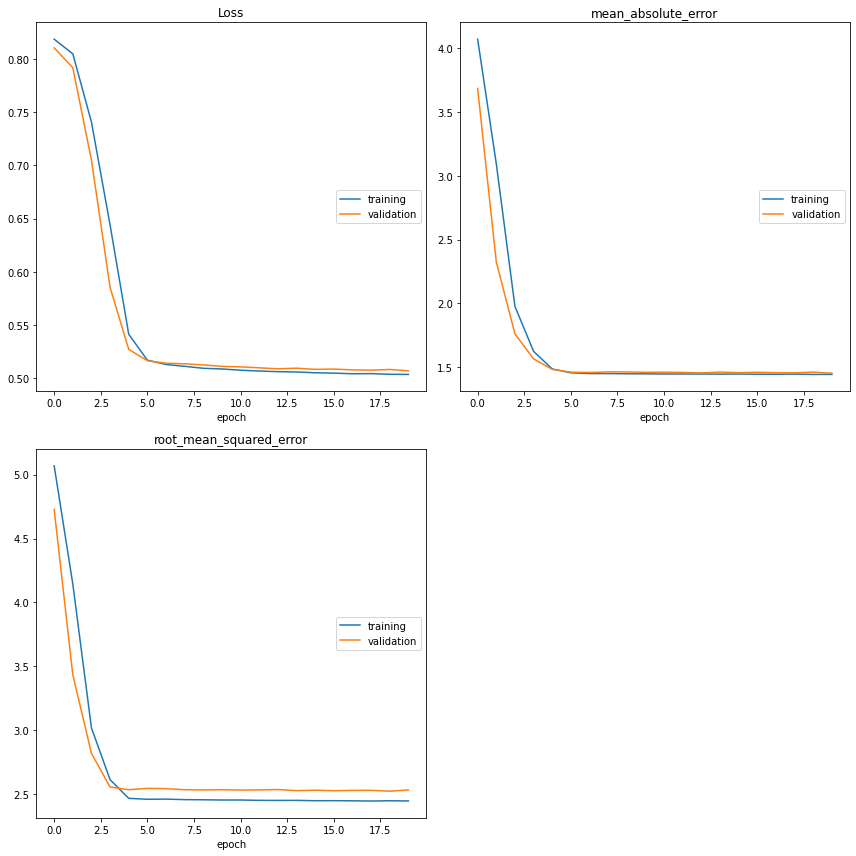

Loss
	training         	 (min:    0.504, max:    0.819, cur:    0.504)
	validation       	 (min:    0.507, max:    0.811, cur:    0.507)
mean_absolute_error
	training         	 (min:    1.442, max:    4.073, cur:    1.443)
	validation       	 (min:    1.452, max:    3.686, cur:    1.452)
root_mean_squared_error
	training         	 (min:    2.447, max:    5.069, cur:    2.447)
	validation       	 (min:    2.524, max:    4.727, cur:    2.534)
137/137 - 2s - loss: 0.5036 - mean_absolute_error: 1.4426 - root_mean_squared_error: 2.4475 - val_loss: 0.5070 - val_mean_absolute_error: 1.4522 - val_root_mean_squared_error: 2.5336


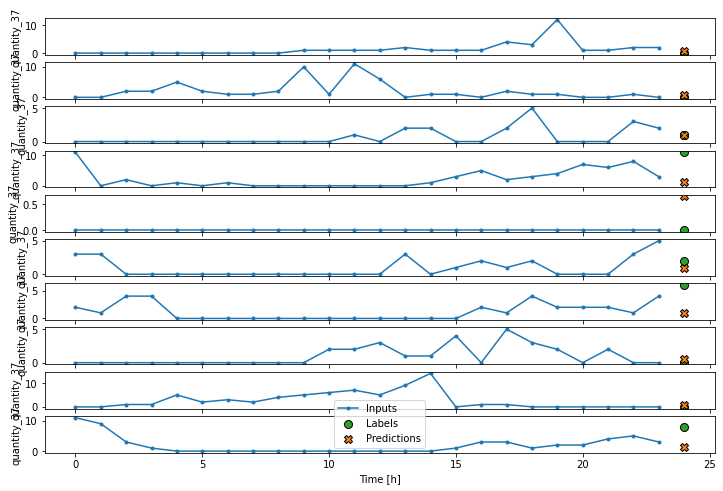

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])
compile_and_fit(model, w1, lr=0.01, max_epochs=20, tensorboard=True)